# 📦 물류데이터 시각화 (Bigcontest) 

## 📌 사용 라이브러리

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [315]:
df_shipping = pd.read_excel("./commerce.xlsx", encoding="cp949")

## 📌 테이블 정의서
#### 기본 정보
* 테이블명 : 일자별 행정동별 카테고리별 물류 건수
* 테이블 개요 : [적재주기:일단위] 기준지역 내 일자별 카테고리별 물류 건수

#### 특기사항
* 기간 : 19년 2월 1일 - 19년 5월 31일, 20년 2월 1일~20년 5월 31일
* 지역 : 대구(수성구, 중구), 서울(노원구, 중구) 내 전 행정동
* 카테고리별(대분류기준) 송장 건수


In [316]:
df_shipping.head()

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21


## 📌 데이터 전처리

In [317]:
df_shipping.columns

Index(['DL_YMD', 'DL_GD_LCLS_NM', 'DL_GD_LCLS_CD', 'CTPV_NM', 'CTPV_CD',
       'CTGG_NM', 'CTGG_CD', 'HDNG_NM', 'HDNG_CD', 'INVC_CONT'],
      dtype='object')

In [318]:
df_shipping.rename(columns={"DL_YMD":"배송년월일"}, inplace=True)
df_shipping.rename(columns={"DL_GD_LCLS_NM":"배송상품대분류명"}, inplace=True)
df_shipping.rename(columns={"DL_GD_LCLS_CD":"배송상품대분류코드"}, inplace=True)
df_shipping.rename(columns={"CTPV_NM":"시도명"}, inplace=True)
df_shipping.rename(columns={"CTPV_CD":"시도코드"}, inplace=True)
df_shipping.rename(columns={"CTGG_NM":"시군구명"}, inplace=True)
df_shipping.rename(columns={"CTGG_CD":"시군구코드"}, inplace=True)
df_shipping.rename(columns={"HDNG_NM":"행정동명"}, inplace=True)
df_shipping.rename(columns={"HDNG_CD":"행정동코드"}, inplace=True)
df_shipping.rename(columns={"INVC_CONT":"송장건수"}, inplace=True)

In [319]:
df_shipping.head()

,배송년월일,배송상품대분류명,배송상품대분류코드,시도명,시도코드,시군구명,시군구코드,행정동명,행정동코드,송장건수
0,190201,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,190201,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,190201,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,190201,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,190201,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21


In [320]:
df = df_shipping.drop(['배송상품대분류코드', '시도코드', '시군구코드','행정동코드'], axis=1)
df

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수
0,190201,도서/음반,서울특별시,중구,동화동,16
1,190201,가구/인테리어,서울특별시,중구,신당동,4
2,190201,가구/인테리어,대구광역시,중구,성내1동,1
3,190201,도서/음반,대구광역시,중구,남산2동,6
4,190201,디지털/가전,대구광역시,수성구,고산3동,21
...,...,...,...,...,...,...
156566,200531,패션의류,대구광역시,수성구,범물2동,22
156567,200531,패션의류,서울특별시,중구,약수동,21
156568,200531,패션잡화,대구광역시,수성구,범물2동,14
156569,200531,패션잡화,서울특별시,노원구,상계6.7동,25


### 결측치 확인

In [321]:
df_shipping.isnull().sum()

배송년월일        0
배송상품대분류명     0
배송상품대분류코드    0
시도명          0
시도코드         0
시군구명         0
시군구코드        0
행정동명         0
행정동코드        0
송장건수         0
dtype: int64

### 배송년월일 날짜타입으로 변환

In [322]:
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   배송년월일      156571 non-null  int64 
 1   배송상품대분류명   156571 non-null  object
 2   배송상품대분류코드  156571 non-null  int64 
 3   시도명        156571 non-null  object
 4   시도코드       156571 non-null  int64 
 5   시군구명       156571 non-null  object
 6   시군구코드      156571 non-null  int64 
 7   행정동명       156571 non-null  object
 8   행정동코드      156571 non-null  int64 
 9   송장건수       156571 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 11.9+ MB


In [323]:
df['배송날짜'] = df['배송년월일'] +20000000

In [324]:
df.head()

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜
0,190201,도서/음반,서울특별시,중구,동화동,16,20190201
1,190201,가구/인테리어,서울특별시,중구,신당동,4,20190201
2,190201,가구/인테리어,대구광역시,중구,성내1동,1,20190201
3,190201,도서/음반,대구광역시,중구,남산2동,6,20190201
4,190201,디지털/가전,대구광역시,수성구,고산3동,21,20190201


In [326]:
df

,배송년월일,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜
0,190201,도서/음반,서울특별시,중구,동화동,16,20190201
1,190201,가구/인테리어,서울특별시,중구,신당동,4,20190201
2,190201,가구/인테리어,대구광역시,중구,성내1동,1,20190201
3,190201,도서/음반,대구광역시,중구,남산2동,6,20190201
4,190201,디지털/가전,대구광역시,수성구,고산3동,21,20190201
...,...,...,...,...,...,...,...
156566,200531,패션의류,대구광역시,수성구,범물2동,22,20200531
156567,200531,패션의류,서울특별시,중구,약수동,21,20200531
156568,200531,패션잡화,대구광역시,수성구,범물2동,14,20200531
156569,200531,패션잡화,서울특별시,노원구,상계6.7동,25,20200531


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   배송년월일     156571 non-null  int64 
 1   배송상품대분류명  156571 non-null  object
 2   시도명       156571 non-null  object
 3   시군구명      156571 non-null  object
 4   행정동명      156571 non-null  object
 5   송장건수      156571 non-null  int64 
 6   배송날짜      156571 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.4+ MB


In [330]:
df['배송날짜'] = pd.to_datetime(df['배송날짜'], format='%Y%m%d')

In [381]:
df.head()

,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송지역
0,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019,2,서울특별시중구
1,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019,2,서울특별시중구
2,가구/인테리어,대구광역시,중구,성내1동,1,2019-02-01,2019,2,대구광역시중구
3,도서/음반,대구광역시,중구,남산2동,6,2019-02-01,2019,2,대구광역시중구
4,디지털/가전,대구광역시,수성구,고산3동,21,2019-02-01,2019,2,대구광역시수성구


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   배송년월일     156571 non-null  int64         
 1   배송상품대분류명  156571 non-null  object        
 2   시도명       156571 non-null  object        
 3   시군구명      156571 non-null  object        
 4   행정동명      156571 non-null  object        
 5   송장건수      156571 non-null  int64         
 6   배송날짜      156571 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 8.4+ MB


### 배송날짜를 '배송연도'와 '배송 월'로 분리하기

In [333]:
import datetime

In [384]:
df['배송연도']=pd.DatetimeIndex(df['배송날짜']).year
df.head()

,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송지역
0,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019,2,서울특별시중구
1,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019,2,서울특별시중구
2,가구/인테리어,대구광역시,중구,성내1동,1,2019-02-01,2019,2,대구광역시중구
3,도서/음반,대구광역시,중구,남산2동,6,2019-02-01,2019,2,대구광역시중구
4,디지털/가전,대구광역시,수성구,고산3동,21,2019-02-01,2019,2,대구광역시수성구


In [387]:
df['배송월']=pd.DatetimeIndex(df['배송날짜']).month
df.head()

,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송지역
0,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019,2,서울특별시중구
1,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019,2,서울특별시중구
2,가구/인테리어,대구광역시,중구,성내1동,1,2019-02-01,2019,2,대구광역시중구
3,도서/음반,대구광역시,중구,남산2동,6,2019-02-01,2019,2,대구광역시중구
4,디지털/가전,대구광역시,수성구,고산3동,21,2019-02-01,2019,2,대구광역시수성구


### 시도명과 시군구명 합치기
* 서울특별시 중구와 대구광역시 중구의 혼란을 줄이기 위해, 시도명과 시군구명을 합쳐 '배송지역'컬럼을 형성한다.

In [389]:
df['배송지역']=df['시도명']+df['시군구명']

In [390]:
서울특별시중구 = df[df['배송지역'] =='서울특별시중구']
서울특별시중구

,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송지역
0,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019,2,서울특별시중구
1,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019,2,서울특별시중구
5,도서/음반,서울특별시,중구,회현동,25,2019-02-01,2019,2,서울특별시중구
7,디지털/가전,서울특별시,중구,황학동,14,2019-02-01,2019,2,서울특별시중구
13,가구/인테리어,서울특별시,중구,약수동,4,2019-02-01,2019,2,서울특별시중구
...,...,...,...,...,...,...,...,...,...
156556,화장품/미용,서울특별시,중구,필동,8,2020-05-31,2020,5,서울특별시중구
156558,패션잡화,서울특별시,중구,장충동,5,2020-05-31,2020,5,서울특별시중구
156561,화장품/미용,서울특별시,중구,다산동,15,2020-05-31,2020,5,서울특별시중구
156563,패션잡화,서울특별시,중구,명동,9,2020-05-31,2020,5,서울특별시중구


In [343]:
대구광역시중구 = df[df['배송지역'] =='대구광역시중구']
대구광역시중구

,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송지역
2,가구/인테리어,대구광역시,중구,성내1동,1,2019-02-01,2019,2,대구광역시중구
3,도서/음반,대구광역시,중구,남산2동,6,2019-02-01,2019,2,대구광역시중구
8,가구/인테리어,대구광역시,중구,남산4동,2,2019-02-01,2019,2,대구광역시중구
9,디지털/가전,대구광역시,중구,대신동,7,2019-02-01,2019,2,대구광역시중구
21,도서/음반,대구광역시,중구,대봉2동,4,2019-02-01,2019,2,대구광역시중구
...,...,...,...,...,...,...,...,...,...
156534,화장품/미용,대구광역시,중구,동인동,13,2020-05-31,2020,5,대구광역시중구
156535,패션잡화,대구광역시,중구,삼덕동,6,2020-05-31,2020,5,대구광역시중구
156537,출산/육아,대구광역시,중구,남산4동,1,2020-05-31,2020,5,대구광역시중구
156545,패션의류,대구광역시,중구,성내2동,8,2020-05-31,2020,5,대구광역시중구


# 📌 확인하고 싶은 데이터 리스트 정리
* 날짜별 배송건수 추이 
* 지역별 날짜에 따른 배송건수 추이
* 날짜에 따른 배송상품대분류별 배송건수 추이
* 지역별 배송상품대분류별 배송건수 차이 / 대구와 서울의 배송상품분류 별 송장건수 차이
* 품목별 매출 신장률

# 📌 데이터 시각화

In [344]:
# 한글폰트 사용을 위한 코드
from matplotlib import rc, font_manager
%matplotlib inline

In [345]:
# 한글폰트 사용을 위한 코드
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [346]:
#레전드 박스 plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

## 대구 vs 서울 비교

In [391]:
df_seoul = df[df['시도명']=='서울특별시']

In [392]:
df_seoul.head()

,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송지역
0,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019,2,서울특별시중구
1,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019,2,서울특별시중구
5,도서/음반,서울특별시,중구,회현동,25,2019-02-01,2019,2,서울특별시중구
7,디지털/가전,서울특별시,중구,황학동,14,2019-02-01,2019,2,서울특별시중구
13,가구/인테리어,서울특별시,중구,약수동,4,2019-02-01,2019,2,서울특별시중구


In [393]:
df_daegu = df[df['시도명']=='대구광역시']

In [394]:
df_daegu.head()

,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송지역
2,가구/인테리어,대구광역시,중구,성내1동,1,2019-02-01,2019,2,대구광역시중구
3,도서/음반,대구광역시,중구,남산2동,6,2019-02-01,2019,2,대구광역시중구
4,디지털/가전,대구광역시,수성구,고산3동,21,2019-02-01,2019,2,대구광역시수성구
6,가구/인테리어,대구광역시,수성구,범어1동,6,2019-02-01,2019,2,대구광역시수성구
8,가구/인테리어,대구광역시,중구,남산4동,2,2019-02-01,2019,2,대구광역시중구


### 1. 배송상품대분류 별 송장건수

* `대구`현황

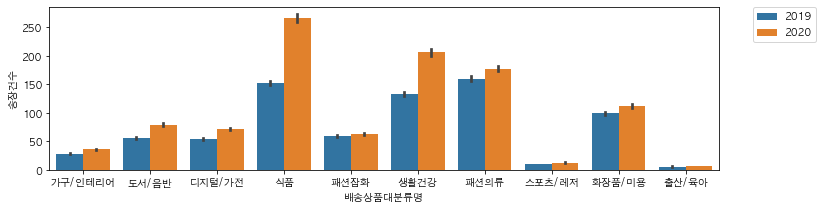

In [395]:
plt.figure(figsize=(12,3))
sns.barplot(data=df_daegu, x="배송상품대분류명", y="송장건수", hue="배송연도")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

* `서울`현황

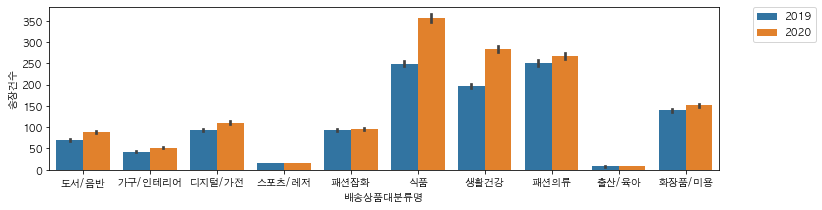

In [396]:
plt.figure(figsize=(12,3))
sns.barplot(data=df_seoul, x="배송상품대분류명", y="송장건수", hue="배송연도")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

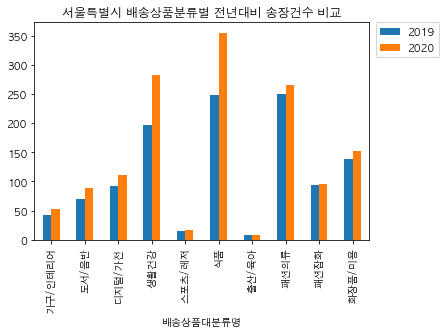

In [454]:
s = pd.pivot_table(df_seoul, index=["배송상품대분류명"], values="송장건수", columns="배송연도").plot.bar()
s.plot(rot=50, figsize=(10,5))
plt.title("서울특별시 배송상품분류별 전년대비 송장건수 비교")
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)
plt.show()

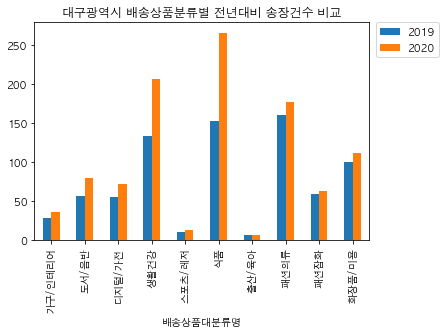

In [455]:
s = pd.pivot_table(df_daegu, index=["배송상품대분류명"], values="송장건수", columns="배송연도").plot.bar()
s.plot(rot=50, figsize=(10,5))
plt.title("대구광역시 배송상품분류별 전년대비 송장건수 비교")
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)
plt.show()

### 생활건강, 스포츠레저 

### 서울 중구 & 노원구 비교

In [467]:
서울중구 = df[df['배송지역'] == '서울특별시중구']
서울중구.head()

,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송지역
0,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019,2,서울특별시중구
1,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019,2,서울특별시중구
5,도서/음반,서울특별시,중구,회현동,25,2019-02-01,2019,2,서울특별시중구
7,디지털/가전,서울특별시,중구,황학동,14,2019-02-01,2019,2,서울특별시중구
13,가구/인테리어,서울특별시,중구,약수동,4,2019-02-01,2019,2,서울특별시중구


In [509]:
df1 = 서울중구.pivot_table(index=["배송상품대분류명", "배송연도"], values="송장건수").round()
df1

송장건수
배송상품대분류명 배송연도       
가구/인테리어  2019   36.0
         2020   40.0
도서/음반    2019   63.0
         2020   72.0
디지털/가전   2019   84.0
         2020   95.0
생활건강     2019  162.0
         2020  217.0
스포츠/레저   2019   14.0
         2020   14.0
식품       2019  196.0
         2020  262.0
출산/육아    2019    5.0
         2020    5.0
패션의류     2019  195.0
         2020  195.0
패션잡화     2019   80.0
         2020   82.0
화장품/미용   2019  108.0
         2020  113.0

In [468]:
서울노원구 = df[df['배송지역'] == '서울특별시노원구']
서울노원구.head()

,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송지역
15,디지털/가전,서울특별시,노원구,상계10동,8,2019-02-01,2019,2,서울특별시노원구
16,도서/음반,서울특별시,노원구,상계8동,32,2019-02-01,2019,2,서울특별시노원구
18,도서/음반,서울특별시,노원구,상계9동,27,2019-02-01,2019,2,서울특별시노원구
20,도서/음반,서울특별시,노원구,월계1동,38,2019-02-01,2019,2,서울특별시노원구
23,가구/인테리어,서울특별시,노원구,공릉1동,8,2019-02-01,2019,2,서울특별시노원구


In [532]:
df2= 서울노원구.pivot_table(index=["배송상품대분류명", "배송연도"], values="송장건수").round()
df2

송장건수
배송상품대분류명 배송연도       
가구/인테리어  2019   47.0
         2020   61.0
도서/음반    2019   75.0
         2020  101.0
디지털/가전   2019   99.0
         2020  123.0
생활건강     2019  223.0
         2020  336.0
스포츠/레저   2019   16.0
         2020   18.0
식품       2019  289.0
         2020  428.0
출산/육아    2019   10.0
         2020   11.0
패션의류     2019  294.0
         2020  322.0
패션잡화     2019  104.0
         2020  106.0
화장품/미용   2019  163.0
         2020  183.0

In [533]:
result = pd.merge(df1, df2, on=['배송상품대분류명', '배송연도'], suffixes=('_중구', '_노원구'))
result

송장건수_중구  송장건수_노원구
배송상품대분류명 배송연도                   
가구/인테리어  2019     36.0      47.0
         2020     40.0      61.0
도서/음반    2019     63.0      75.0
         2020     72.0     101.0
디지털/가전   2019     84.0      99.0
         2020     95.0     123.0
생활건강     2019    162.0     223.0
         2020    217.0     336.0
스포츠/레저   2019     14.0      16.0
         2020     14.0      18.0
식품       2019    196.0     289.0
         2020    262.0     428.0
출산/육아    2019      5.0      10.0
         2020      5.0      11.0
패션의류     2019    195.0     294.0
         2020    195.0     322.0
패션잡화     2019     80.0     104.0
         2020     82.0     106.0
화장품/미용   2019    108.0     163.0
         2020    113.0     183.0

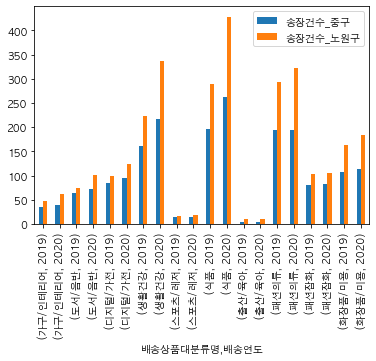

In [524]:
result.plot(kind='bar')

흠..이상해.....

In [527]:
result.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20 entries, ('가구/인테리어', 2019) to ('화장품/미용', 2020)
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   송장건수_중구   20 non-null     float64
 1   송장건수_노원구  20 non-null     float64
dtypes: float64(2)
memory usage: 628.0+ bytes


<Figure size 1440x216 with 0 Axes>

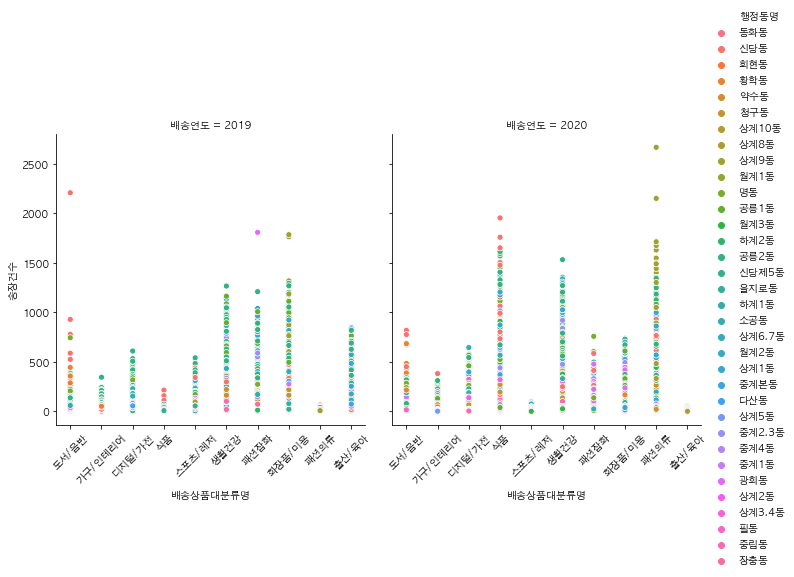

In [586]:
plt.figure(figsize=(20,3))
chart_seoul= sns.relplot(data=df_seoul, x="배송상품대분류명", y="송장건수", hue="행정동명", kind='scatter', col='배송연도')
chart_seoul.set_xticklabels(rotation=45)

<Figure size 1440x216 with 0 Axes>

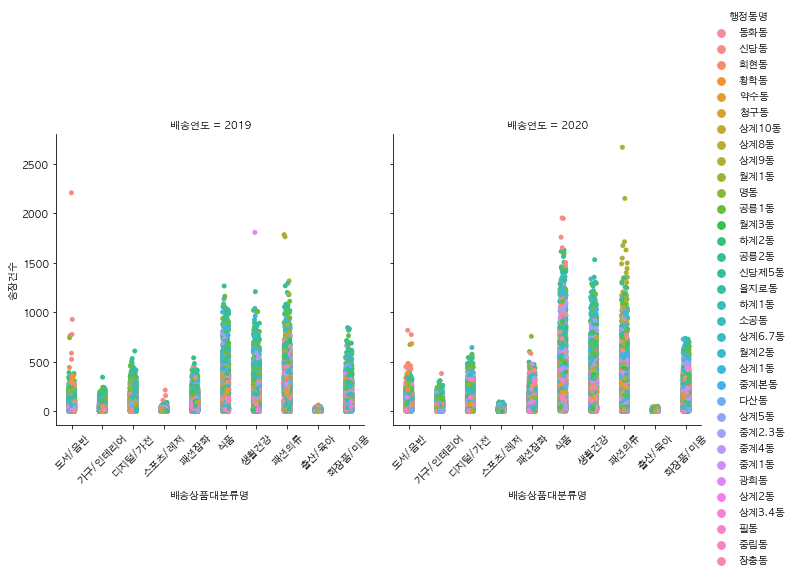

In [591]:
plt.figure(figsize=(20,3))
cat_seoul=sns.catplot(data=df_seoul, x="배송상품대분류명", y="송장건수", hue="행정동명", col='배송연도')
cat_seoul.set_xticklabels(rotation=45)

In [549]:
df_seoul

,배송상품대분류명,시도명,시군구명,행정동명,송장건수,배송날짜,배송연도,배송월,배송지역
0,도서/음반,서울특별시,중구,동화동,16,2019-02-01,2019,2,서울특별시중구
1,가구/인테리어,서울특별시,중구,신당동,4,2019-02-01,2019,2,서울특별시중구
5,도서/음반,서울특별시,중구,회현동,25,2019-02-01,2019,2,서울특별시중구
7,디지털/가전,서울특별시,중구,황학동,14,2019-02-01,2019,2,서울특별시중구
13,가구/인테리어,서울특별시,중구,약수동,4,2019-02-01,2019,2,서울특별시중구
...,...,...,...,...,...,...,...,...,...
156563,패션잡화,서울특별시,중구,명동,9,2020-05-31,2020,5,서울특별시중구
156564,화장품/미용,서울특별시,노원구,상계1동,39,2020-05-31,2020,5,서울특별시노원구
156565,출산/육아,서울특별시,노원구,상계10동,1,2020-05-31,2020,5,서울특별시노원구
156567,패션의류,서울특별시,중구,약수동,21,2020-05-31,2020,5,서울특별시중구


<Figure size 1440x216 with 0 Axes>

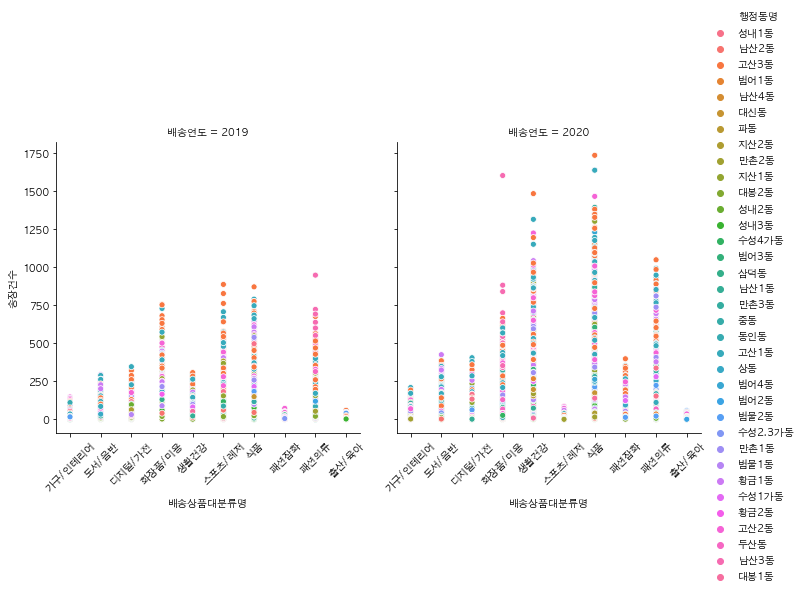

In [587]:
plt.figure(figsize=(20,3))
chart_daegu= sns.relplot(data=df_daegu, x="배송상품대분류명", y="송장건수", hue="행정동명", kind='scatter', col='배송연도')
chart_daegu.set_xticklabels(rotation=45)